<a href="https://colab.research.google.com/github/Akriti789-abc/-TP53-Mutation-Analysis/blob/main/TP53_variant_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
germline = pd.read_csv('GermlineDownload_r21.csv')
tumor = pd.read_csv('TumorVariantDownload_r21.csv')

print("Germline shape:", germline.shape)
print("Tumor shape:", tumor.shape)

print(germline.columns)
print(tumor.columns)





Germline shape: (4649, 74)
Tumor shape: (29891, 87)
Index(['Family_ID', 'Family_code', 'Country', 'Population', 'Region',
       'Development', 'Class', 'Generations_analyzed', 'Germline_mutation',
       'MUT_ID', 'hg18_Chr17_coordinates', 'hg19_Chr17_coordinates',
       'hg38_Chr17_coordinates', 'ExonIntron', 'Codon_number', 'Type',
       'Description', 'c_description', 'g_description', 'g_description_GRCh38',
       'WT_nucleotide', 'Mutant_nucleotide', 'WT_codon', 'Mutant_codon',
       'CpG_site', 'Splice_site', 'Context_coding_3', 'WT_AA', 'Mutant_AA',
       'Effect', 'AGVGDClass', 'SIFTClass', 'Polyphen2', 'REVEL', 'BayesDel',
       'TransactivationClass', 'DNE_LOFclass', 'DNEclass', 'ProtDescription',
       'COSMIClink', 'CLINVARlink', 'TCGA_ICGC_GENIE_count', 'Hotspot',
       'Domain_function', 'Residue_function', 'Individual_ID',
       'Individual_code', 'FamilyCase', 'FamilyCase_group', 'Generation',
       'Sex', 'Germline_carrier', 'Mode_of_inheritance', 'Dead', 'Un

In [8]:
#  Check and clean tumor + germline data columns

# View all columns in both datasets
print("Tumor dataset columns:\n", tumor.columns.tolist())
print("\nGermline dataset columns:\n", germline.columns.tolist())

#  Clean column names (remove spaces and lowercase everything)
tumor.columns = tumor.columns.str.strip().str.lower()
germline.columns = germline.columns.str.strip().str.lower()

print("\nAfter cleaning:")
print("Tumor dataset columns:", tumor.columns.tolist())
print("Germline dataset columns:", germline.columns.tolist())

#  Try to identify the right codon column
# (Check manually from the printed output — then replace below)
# For example, if your tumor file shows 'codon' or 'aa_pos', update accordingly

# Example assuming the column is named 'codon'
if 'codon' in tumor.columns:
    tumor['codon'] = tumor['codon'].astype(str)
elif 'codon_number' in tumor.columns:
    tumor['codon'] = tumor['codon_number'].astype(str)

if 'codon' in germline.columns:
    germline['codon'] = germline['codon'].astype(str)
elif 'codon_number' in germline.columns:
    germline['codon'] = germline['codon_number'].astype(str)

# Drop missing rows for cleaner results
tumor.dropna(subset=['codon'], inplace=True)
germline.dropna(subset=['codon'], inplace=True)

# Confirm it worked
print("\nNumber of tumor variants:", tumor.shape[0])
print("Number of germline variants:", germline.shape[0])

#  Compare overlap between tumor and germline variants
common_codons = set(germline['codon']).intersection(set(tumor['codon']))
print("\nCommon codons found in both germline and tumor variants:")
print(common_codons)


Tumor dataset columns:
 ['mutation_id', 'mut_id', 'hg18_chr17_coordinates', 'hg19_chr17_coordinates', 'hg38_chr17_coordinates', 'exonintron', 'codon_number', 'description', 'c_description', 'g_description', 'g_description_grch38', 'wt_nucleotide', 'mutant_nucleotide', 'splice_site', 'cpg_site', 'context_coding_3', 'type', 'mut_rate', 'wt_codon', 'mutant_codon', 'wt_aa', 'mutant_aa', 'protdescription', 'cosmiclink', 'clinvarlink', 'tcga_icgc_genie_count', 'mut_rateaa', 'effect', 'agvgdclass', 'siftclass', 'polyphen2', 'revel', 'bayesdel', 'transactivationclass', 'dne_lofclass', 'dneclass', 'structurefunctionclass', 'hotspot', 'structural_motif', 'sample_name', 'sample_id', 'sample_source', 'tumor_origin', 'topography', 'short_topo', 'topo_code', 'sub_topography', 'morphology', 'morpho_code', 'grade', 'stage', 'tnm', 'p53_ihc', 'kras_status', 'other_mutations', 'other_associations', 'add_info', 'individual_id', 'sex', 'age', 'ethnicity', 'geo_area', 'country', 'development', 'population'

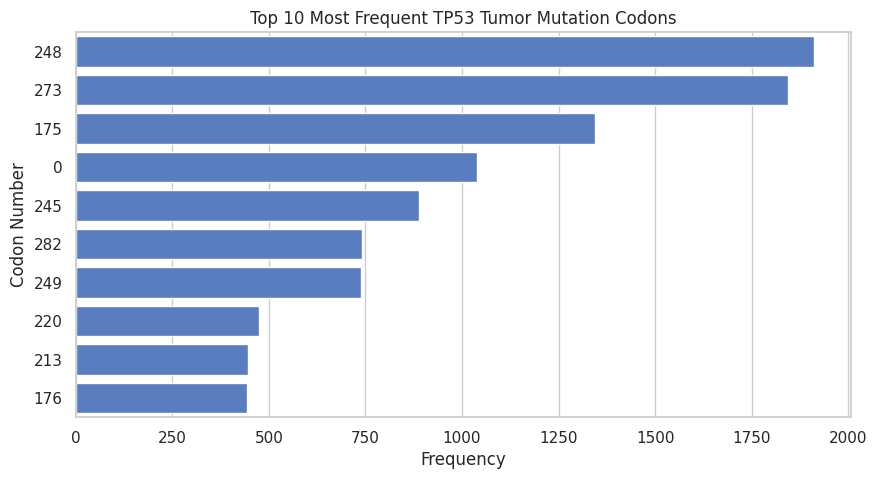

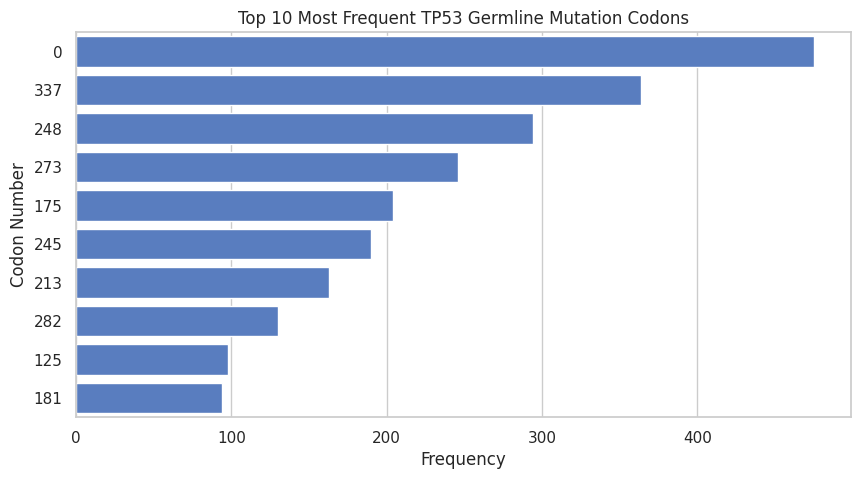

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# Top 10 tumor mutation codons
plt.figure(figsize=(10,5))
sns.countplot(
    y='codon_number',
    data=tumor,
    order=tumor['codon_number'].value_counts().index[:10]
)
plt.title('Top 10 Most Frequent TP53 Tumor Mutation Codons')
plt.xlabel('Frequency')
plt.ylabel('Codon Number')
plt.show()

# Top 10 germline mutation codons
plt.figure(figsize=(10,5))
sns.countplot(
    y='codon_number',
    data=germline,
    order=germline['codon_number'].value_counts().index[:10]
)
plt.title('Top 10 Most Frequent TP53 Germline Mutation Codons')
plt.xlabel('Frequency')
plt.ylabel('Codon Number')
plt.show()


In [12]:
# Recreate codon sets before plotting Venn diagram

# assuming you already have the two DataFrames: tumor and germline
tumor_codons = set(tumor['codon_number'].dropna().astype(str))
germline_codons = set(germline['codon_number'].dropna().astype(str))

common_codons = tumor_codons.intersection(germline_codons)

print("Tumor codons:", len(tumor_codons))
print("Germline codons:", len(germline_codons))
print("Common codons:", len(common_codons))


Tumor codons: 377
Germline codons: 231
Common codons: 226


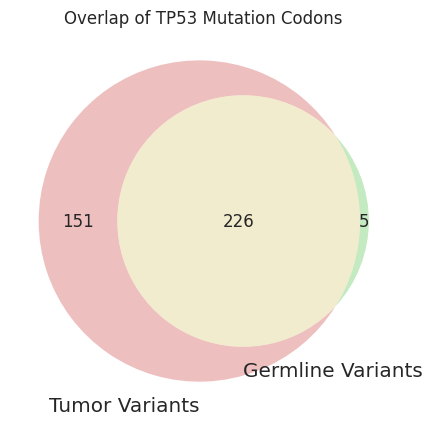

In [13]:
!pip install matplotlib-venn
from matplotlib_venn import venn2

plt.figure(figsize=(5,5))
venn2(
    subsets = (
        len(tumor_codons - germline_codons),
        len(germline_codons - tumor_codons),
        len(common_codons)
    ),
    set_labels = ('Tumor Variants', 'Germline Variants')
)
plt.title('Overlap of TP53 Mutation Codons')
plt.show()
